City of Los Angeles crime data from 2020 to current date

### Problem statement: Find out the area where the crime rate is higher and where the los angeles coup should priortize highly

In [1]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("Crime_data.csv")

In [3]:
df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
5,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
6,200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631
7,200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,40,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,998.0,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
8,200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,700 BERNARD ST,NaN,34.0677,-118.2398
9,201710201,06/19/2020 12:00:00 AM,05/26/2020 12:00:00 AM,1925,17,Devonshire,1708,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,AO,Adult Other,341.0,NaN,NaN,NaN,11900 BALBOA BL,NaN,34.2864,-118.5021


In [4]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [5]:
df.shape

(775342, 28)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775342 entries, 0 to 775341
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           775342 non-null  int64  
 1   Date Rptd       775342 non-null  object 
 2   DATE OCC        775342 non-null  object 
 3   TIME OCC        775342 non-null  int64  
 4   AREA            775342 non-null  int64  
 5   AREA NAME       775342 non-null  object 
 6   Rpt Dist No     775342 non-null  int64  
 7   Part 1-2        775342 non-null  int64  
 8   Crm Cd          775342 non-null  int64  
 9   Crm Cd Desc     775342 non-null  object 
 10  Mocodes         668849 non-null  object 
 11  Vict Age        775342 non-null  int64  
 12  Vict Sex        673983 non-null  object 
 13  Vict Descent    673975 non-null  object 
 14  Premis Cd       775333 non-null  float64
 15  Premis Desc     774886 non-null  object 
 16  Weapon Used Cd  269564 non-null  float64
 17  Weapon Des

In [7]:
# Assuming you have a DataFrame called 'df' with the original column names
original_columns = ['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
                   'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
                   'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
                   'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
                   'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
                   'LON']

# New column names you want to set
new_columns = ['DR_NUMBER', 'Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Area', 'Area_Name',
               'Report_District_Number', 'Part_Type', 'Crime_Code', 'Crime_Description', 'Modcodes',
               'Victim_Age', 'Victim_Sex', 'Victim_Descent', 'Premises_Code', 'Premises_Description',
               'Weapon_Used_Code', 'Weapon_Description', 'Status', 'Status_Description', 'Crime_Code_1',
               'Crime_Code_2', 'Crime_Code_3', 'Crime_Code_4', 'Location', 'Cross_Street', 'Latitude',
               'Longitude']

# Rename the columns
df.columns = new_columns

In [8]:
df.head(10)

,DR_NUMBER,Date_Reported,Date_Occurred,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Code,Crime_Description,...,Status,Status_Description,Crime_Code_1,Crime_Code_2,Crime_Code_3,Crime_Code_4,Location,Cross_Street,Latitude,Longitude
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
5,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
6,200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631
7,200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,40,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,998.0,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
8,200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,700 BERNARD ST,NaN,34.0677,-118.2398
9,201710201,06/19/2020 12:00:00 AM,05/26/2020 12:00:00 AM,1925,17,Devonshire,1708,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,AO,Adult Other,341.0,NaN,NaN,NaN,11900 BALBOA BL,NaN,34.2864,-118.5021


In [9]:
df.Modcodes.value_counts()

Modcodes
0344                                  32044
0329                                  17553
1822 0344                              9219
1501                                   7724
0344 1822                              6591
                                      ...  
0334 0400 0450 1822                       1
0602 0342 0360 0334 0302 0443 0913        1
0329 0344 1202 1300 1607                  1
1501 0602 2004 2038 0913 0561 2002        1
0601 0445 0416 0359                       1
Name: count, Length: 260160, dtype: int64

In [10]:
df = df.drop(['DR_NUMBER', 'Status', 'Status_Description','Crime_Code_2', 'Crime_Code_3', 'Crime_Code_4', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported', 'Crime_Code', 'Victim_Sex', 'Premises_Code','Weapon_Used_Code','Victim_Age', 'Location', 'Modcodes'], axis = 1)

In [11]:
df.head(10)

,Date_Occurred,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1
0,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0
1,01/01/2020 12:00:00 AM,330,1,Central,163,2,BATTERY - SIMPLE ASSAULT,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0
2,02/13/2020 12:00:00 AM,1200,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,X,POLICE FACILITY,NaN,845.0
3,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0
4,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",X,BEAUTY SUPPLY STORE,NaN,740.0
5,01/01/2020 12:00:00 AM,30,1,Central,163,1,"RAPE, FORCIBLE",H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0
6,01/02/2020 12:00:00 AM,1315,1,Central,161,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),H,DEPARTMENT STORE,NaN,442.0
7,01/04/2020 12:00:00 AM,40,1,Central,155,2,OTHER MISCELLANEOUS CRIME,X,POLICE FACILITY,NaN,946.0
8,01/04/2020 12:00:00 AM,200,1,Central,101,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,341.0
9,05/26/2020 12:00:00 AM,1925,17,Devonshire,1708,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",X,OTHER BUSINESS,NaN,341.0


In [12]:

from datetime import datetime

def military_to_regular_time(military_time):
    try:
        military_time_obj = datetime.strptime(str(military_time), '%H%M')
        regular_time = military_time_obj.strftime('%Y-%m-%d %H:%M:%S')
        return regular_time
    except ValueError:
        return military_time

# Convert military times to regular times in the Time_Occurred column
df['Date_Occurred'] = df['Date_Occurred'].apply(military_to_regular_time)
df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'])
df['Mnth'] = df['Date_Occurred'].dt.month
df['Day_of_week'] = df['Date_Occurred'].dt.day_name()



/tmp/ipykernel_65555/3571419508.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'])


In [13]:
df = df.drop('Date_Occurred', axis = 1)

### Converting military time

In [14]:
from datetime import datetime

def military_to_regular_time(military_time):
    try:
        military_time_obj = datetime.strptime(str(military_time), '%H%M')
        regular_time = military_time_obj.strftime('%H:%M')
        return regular_time
    except ValueError:
        return military_time


# Convert military times to regular times in the Time_Occurred column
df['Time_Occurred'] = df['Time_Occurred'].apply(military_to_regular_time)

In [15]:
df.Time_Occurred.head(10)

0    22:30
1    03:30
2    12:00
3    17:30
4    04:15
5    03:00
6    13:15
7    04:00
8    20:00
9    19:25
Name: Time_Occurred, dtype: object

### Handling month

In [16]:
def month_name(x):
    if x == 1:
        return 'Jan'
    elif x == 2:
        return 'Feb'
    elif x == 3:
        return 'Mar'
    elif x == 4:
        return 'Apr'
    elif x == 5:
        return 'May'
    elif x == 6:
        return 'Jun'
    elif x == 7:
        return 'Jul'
    elif x == 8:
        return 'Aug'
    elif x == 9:
        return 'Sep'
    elif x == 10:
        return 'Oct'
    elif x == 11:
        return 'Nov'
    elif x == 12:
        return 'Dec'

df['Month'] = df['Mnth'].apply(month_name)


In [17]:
df = df.drop('Mnth', axis = 1)

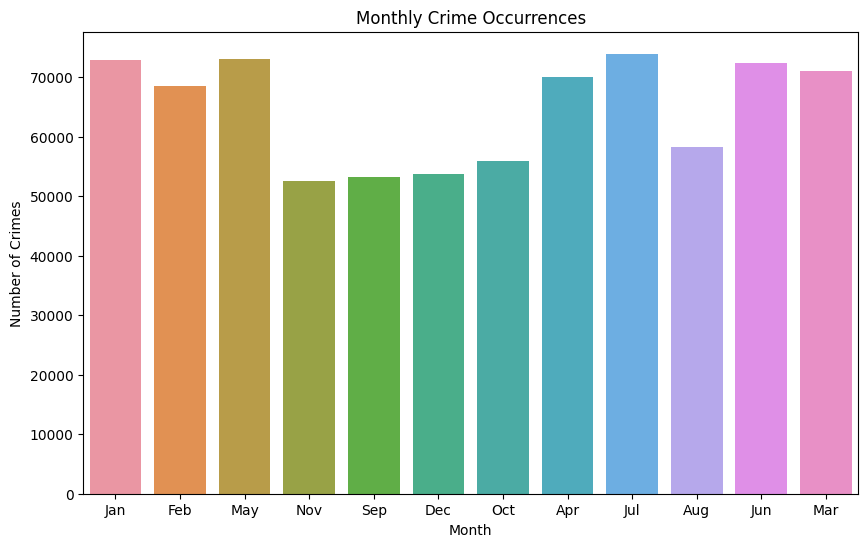

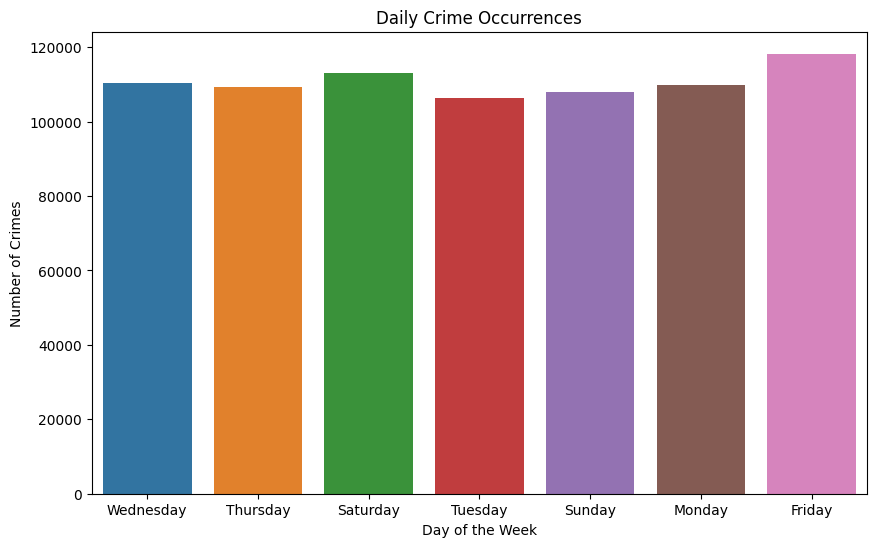

In [18]:

# Plot crime occurrences by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data= df)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Monthly Crime Occurrences')
plt.show()


# Plot crime occurrences by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_week', data= df)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.title('Daily Crime Occurrences')
plt.show()


In [19]:
# df.Date_Occurred.head(10)

In [20]:
df.head(10)

,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month
0,22:30,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan
1,03:30,1,Central,163,2,BATTERY - SIMPLE ASSAULT,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan
2,12:00,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,X,POLICE FACILITY,NaN,845.0,Thursday,Feb
3,17:30,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0,Wednesday,Jan
4,04:15,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",X,BEAUTY SUPPLY STORE,NaN,740.0,Wednesday,Jan
5,03:00,1,Central,163,1,"RAPE, FORCIBLE",H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Jan
6,13:15,1,Central,161,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),H,DEPARTMENT STORE,NaN,442.0,Thursday,Jan
7,04:00,1,Central,155,2,OTHER MISCELLANEOUS CRIME,X,POLICE FACILITY,NaN,946.0,Saturday,Jan
8,20:00,1,Central,101,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,341.0,Saturday,Jan
9,19:25,17,Devonshire,1708,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",X,OTHER BUSINESS,NaN,341.0,Tuesday,May


In [21]:
df.Crime_Description.value_counts()

Crime_Description
VEHICLE - STOLEN                                           82844
BATTERY - SIMPLE ASSAULT                                   61500
THEFT OF IDENTITY                                          49859
BURGLARY FROM VEHICLE                                      47749
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    47485
                                                           ...  
GRAND THEFT / AUTO REPAIR                                      3
PICKPOCKET, ATTEMPT                                            3
FAILURE TO DISPERSE                                            2
DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
INCITING A RIOT                                                1
Name: count, Length: 138, dtype: int64

In [22]:
df.Weapon_Description.value_counts()

Weapon_Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    144718
UNKNOWN WEAPON/OTHER WEAPON                        28179
VERBAL THREAT                                      19774
HAND GUN                                           16741
SEMI-AUTOMATIC PISTOL                               6128
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [23]:
df.head(10)

,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month
0,22:30,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan
1,03:30,1,Central,163,2,BATTERY - SIMPLE ASSAULT,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan
2,12:00,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,X,POLICE FACILITY,NaN,845.0,Thursday,Feb
3,17:30,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0,Wednesday,Jan
4,04:15,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",X,BEAUTY SUPPLY STORE,NaN,740.0,Wednesday,Jan
5,03:00,1,Central,163,1,"RAPE, FORCIBLE",H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Jan
6,13:15,1,Central,161,1,SHOPLIFTING - PETTY THEFT ($950 & UNDER),H,DEPARTMENT STORE,NaN,442.0,Thursday,Jan
7,04:00,1,Central,155,2,OTHER MISCELLANEOUS CRIME,X,POLICE FACILITY,NaN,946.0,Saturday,Jan
8,20:00,1,Central,101,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,341.0,Saturday,Jan
9,19:25,17,Devonshire,1708,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",X,OTHER BUSINESS,NaN,341.0,Tuesday,May


In [24]:
df.head()

,Time_Occurred,Area,Area_Name,Report_District_Number,Part_Type,Crime_Description,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month
0,22:30,3,Southwest,377,2,BATTERY - SIMPLE ASSAULT,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan
1,03:30,1,Central,163,2,BATTERY - SIMPLE ASSAULT,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan
2,12:00,1,Central,155,2,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,X,POLICE FACILITY,NaN,845.0,Thursday,Feb
3,17:30,15,N Hollywood,1543,2,VANDALISM - MISDEAMEANOR ($399 OR UNDER),W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0,Wednesday,Jan
4,04:15,19,Mission,1998,2,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",X,BEAUTY SUPPLY STORE,NaN,740.0,Wednesday,Jan


In [25]:
df.Area.value_counts()

Area
1     52047
12    49091
14    45364
3     43237
6     41231
18    39717
20    39249
13    38660
15    38588
7     36700
2     35972
8     35635
11    33479
9     32935
10    32442
5     32147
21    31441
17    31422
19    30859
4     29107
16    26019
Name: count, dtype: int64

In [26]:
df.Area_Name.value_counts()

Area_Name
Central        52047
77th Street    49091
Pacific        45364
Southwest      43237
Hollywood      41231
Southeast      39717
Olympic        39249
Newton         38660
N Hollywood    38588
Wilshire       36700
Rampart        35972
West LA        35635
Northeast      33479
Van Nuys       32935
West Valley    32442
Harbor         32147
Topanga        31441
Devonshire     31422
Mission        30859
Hollenbeck     29107
Foothill       26019
Name: count, dtype: int64

In [27]:
df.Report_District_Number.value_counts()   # remove 

Report_District_Number
162     4124
645     3903
182     3666
1494    3456
646     3383
        ... 
226        1
771        1
1048       1
704        1
1046       1
Name: count, Length: 1201, dtype: int64

In [28]:
df = df.drop('Report_District_Number', axis = 1)

In [29]:
df.Part_Type.value_counts()

Part_Type
1    453515
2    321827
Name: count, dtype: int64

### Crime description 

In [30]:
df.Crime_Description.value_counts()

Crime_Description
VEHICLE - STOLEN                                           82844
BATTERY - SIMPLE ASSAULT                                   61500
THEFT OF IDENTITY                                          49859
BURGLARY FROM VEHICLE                                      47749
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    47485
                                                           ...  
GRAND THEFT / AUTO REPAIR                                      3
PICKPOCKET, ATTEMPT                                            3
FAILURE TO DISPERSE                                            2
DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
INCITING A RIOT                                                1
Name: count, Length: 138, dtype: int64

In [31]:
df.Crime_Description.unique()

array(['BATTERY - SIMPLE ASSAULT',
       'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT OF IDENTITY',
       'ROBBERY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BURGLARY', 'VEHICLE - STOLEN',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'BRANDISH WEAPON', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'BUNCO, GRAND THEFT', 'THEFT, PERSON',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN',
       'BATTERY POLICE (SIMPLE)',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'VIOLAT

In [32]:
# def group_low_value_counts(data, column_name, threshold):
#     value_counts = data[column_name].value_counts()
#     low_value_counts = value_counts[value_counts < threshold].index
#     data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Crime_Description'
#     return data
# df = group_low_value_counts(df, column_name = 'Crime_Description', threshold = 1000)
# bn = df.Crime_Description.value_counts()
# bn

### Convert into genre

In [33]:
# Create a mapping of crime types to genres
crime_genre_mapping = {
    'VEHICLE - STOLEN': 'Theft',
    'BATTERY - SIMPLE ASSAULT': 'Assault',
    'THEFT OF IDENTITY': 'Identity Theft',
    'BURGLARY FROM VEHICLE': 'Burglary',
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'Vandalism',
    'BURGLARY': 'Burglary',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Assault',
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'Theft',
    'INTIMATE PARTNER - SIMPLE ASSAULT': 'Assault',
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Theft',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Theft',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'Theft',
    'VANDALISM - MISDEAMEANOR ($399 OR UNDER)': 'Vandalism',
    'THROWING OBJECT AT MOVING VEHICLE': 'Vandalism',
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'Theft',
    'CRIMINAL THREATS - NO WEAPON DISPLAYED': 'Assault',
    'BRANDISH WEAPON': 'Assault',
    'TRESPASSING': 'Other',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT': 'Assault',
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER': 'Assault',
    'VIOLATION OF RESTRAINING ORDER': 'Other',
    'BIKE - STOLEN': 'Theft',
    'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 'Other',
    'OTHER MISCELLANEOUS CRIME': 'Other',
    'VIOLATION OF COURT ORDER': 'Other',
    'BUNCO, GRAND THEFT': 'Theft',
    'ATTEMPTED ROBBERY': 'Theft',
    'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'Theft',
    'THEFT, PERSON': 'Theft',
    'BATTERY WITH SEXUAL CONTACT': 'Assault',
    'BURGLARY, ATTEMPTED': 'Burglary',
    'BURGLARY FROM VEHICLE, ATTEMPTED': 'Burglary',
    'RAPE, FORCIBLE': 'Sexual Assault',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)': 'Theft',
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 'Assault',
    'DOCUMENT FORGERY / STOLEN FELONY': 'Forgery',
    'VEHICLE - ATTEMPT STOLEN': 'Theft',
    'CONTEMPT OF COURT': 'Other',
    'DISCHARGE FIREARMS/SHOTS FIRED': 'Firearms',
    'ARSON': 'Arson',
    'BATTERY POLICE (SIMPLE)': 'Assault',
    'PICKPOCKET': 'Theft',
    'BUNCO, PETTY THEFT': 'Theft',
    'EXTORTION': 'Assault',
    'SHOTS FIRED AT INHABITED DWELLING': 'Firearms',
    'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)': 'Theft',
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)': 'Assault',
    'CRIMINAL HOMICIDE': 'Homicide',
    'MANSLAUGHTER, NEGLIGENT': 'Homicide',
    'DISTURBING THE PEACE': 'Other',
    'FAILURE TO YIELD': 'Other',
    'SEXUAL PENETRATION W/FOREIGN OBJECT': 'Sexual Assault',
    'DISTURBING THE PEACE' : 'Other',
    'OTHER MISCELLANEOUS CRIME': 'Other',
    'TRESPASSING': 'Other',
    'OTHER ASSAULT': 'Assault',
    'CONTEMPT OF COURT': 'Other',
    'VEHICLE - STOLEN': 'Theft',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'Theft',
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'Theft',
    'THEFT OF IDENTITY': 'Theft',
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Theft',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Theft',
    'THEFT FROM MOTOR VEHICLE - ATTEMPT': 'Theft',
    'THEFT PLAIN - ATTEMPT': 'Theft',
    'THEFT, PERSON': 'Theft',
    'BUNCO, PETTY THEFT': 'Theft',
    'PURSE SNATCHING': 'Theft',
    'THEFT FROM PERSON - ATTEMPT': 'Theft',
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)': 'Theft',
    'THEFT, COIN MACHINE - ATTEMPT': 'Theft',
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)': 'Theft',
    'THEFT FROM VEHICLE - ATTEMPT': 'Theft',
    'ROBBERY': 'Theft',
    'RAPE, ATTEMPTED': 'Sexual Assault',
    'INDECENT EXPOSURE': 'Sexual Assault',
    'INDECENT EXPOSURE': 'Sexual Assault',
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE': 'Sexual Assault',
    'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 'Sexual Assault',
    'SEX, UNLAWFUL (INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ)': 'Sexual Assault',
    'ORAL COPULATION': 'Sexual Assault',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 'Sexual Assault',
    'CHILD PORNOGRAPHY': 'Sexual Assault',
    'LEWD/LASCIVIOUS ACTS WITH CHILD': 'Sexual Assault',
    'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)': 'Sexual Assault',
    'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT': 'Theft',
    'CHILD NEGLECT (SEE 300 W.I.C.)': 'Other',
    'CHILD ANNOYING (17YRS & UNDER)': 'Other',
    'RESISTING ARREST': 'Other',
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE': 'Other',
    'VIOLATION OF TEMPORARY RESTRAINING ORDER': 'Other',
    'KIDNAPPING': 'Other',
    'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 'Other',
    'CHILD STEALING': 'Other',
    'BOMB SCARE': 'Other',
    'PEEPING TOM': 'Other',
    'FALSE IMPRISONMENT': 'Other',
    'DRIVING WITHOUT OWNER CONSENT (DWOC)': 'Other',
    'FALSE POLICE REPORT': 'Other',
    'PIMPING': 'Other',
    'KIDNAPPING - GRAND ATTEMPT': 'Other',
    'PROWLER': 'Other',
    'DISRUPT SCHOOL': 'Other',
    'FAILURE TO DISPERSE': 'Other',
    'INCITING A RIOT': 'Other',
    'UNAUTHORIZED COMPUTER ACCESS': 'Identity Theft',
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)': 'Identity Theft',
    'CREDIT CARDS, FRAUD USE ($950 & UNDER)': 'Identity Theft',
    'DOCUMENT WORTHLESS ($200.01 & OVER)': 'Identity Theft',
    'WEAPONS POSSESSION/BOMBING': 'Firearms',
    'FIREARMS RESTRAINING ORDER (FIREARMS RO)': 'Firearms',
    'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)': 'Firearms',
    'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT' : 'Firearms',
    'ILLEGAL DUMPING' : 'Arson',
    'COUNTERFEIT' : 'Forgery'


    
}

# Apply the mapping to create a new 'Crime_Genre' column
df['Crime_Genre'] = df['Crime_Description'].map(crime_genre_mapping)

df = df.drop('Crime_Description', axis = 1)


In [34]:
df.Crime_Genre.value_counts()

Crime_Genre
Theft             334531
Assault           199911
Burglary           98659
Vandalism          69255
Other              50140
Sexual Assault      6734
Firearms            4137
Forgery             2788
Arson               2239
Homicide            1332
Identity Theft       609
Name: count, dtype: int64

In [35]:

# Replace 'Theft' and 'Identity Theft' with 'Total Theft' in the 'Crime_Genre' column
df['Crime_Genre'] = df['Crime_Genre'].replace(['Theft', 'Identity Theft'], 'Total Theft')
df['Crime_Genre'].value_counts()


Crime_Genre
Total Theft       335140
Assault           199911
Burglary           98659
Vandalism          69255
Other              50140
Sexual Assault      6734
Firearms            4137
Forgery             2788
Arson               2239
Homicide            1332
Name: count, dtype: int64

In [36]:
df.Crime_Genre.isnull().sum()

5007

In [37]:
df.head(10)

,Time_Occurred,Area,Area_Name,Part_Type,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month,Crime_Genre
0,22:30,3,Southwest,2,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan,Assault
1,03:30,1,Central,2,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan,Assault
2,12:00,1,Central,2,X,POLICE FACILITY,NaN,845.0,Thursday,Feb,Other
3,17:30,15,N Hollywood,2,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,745.0,Wednesday,Jan,Vandalism
4,04:15,19,Mission,2,X,BEAUTY SUPPLY STORE,NaN,740.0,Wednesday,Jan,Vandalism
5,03:00,1,Central,1,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Jan,Sexual Assault
6,13:15,1,Central,1,H,DEPARTMENT STORE,NaN,442.0,Thursday,Jan,Total Theft
7,04:00,1,Central,2,X,POLICE FACILITY,NaN,946.0,Saturday,Jan,Other
8,20:00,1,Central,1,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,341.0,Saturday,Jan,Total Theft
9,19:25,17,Devonshire,1,X,OTHER BUSINESS,NaN,341.0,Tuesday,May,Total Theft


### Victim Descent


In [38]:
df.Victim_Descent.value_counts() 

Victim_Descent
H    238017
W    158833
B    111130
X     73797
O     61426
A     16927
K      4124
F      3236
C      2925
J      1081
V       780
I       742
Z       387
P       210
U       161
D        54
G        51
L        48
S        44
-         2
Name: count, dtype: int64

In [39]:
# Remove the row with '-' value from the DataFrame
df = df[df['Victim_Descent'] != '-']

# Display the updated value counts after removing the '-' row
print(df['Victim_Descent'].value_counts())

Victim_Descent
H    238017
W    158833
B    111130
X     73797
O     61426
A     16927
K      4124
F      3236
C      2925
J      1081
V       780
I       742
Z       387
P       210
U       161
D        54
G        51
L        48
S        44
Name: count, dtype: int64


In [40]:
df.Victim_Descent.isnull().sum()

101367

In [41]:
# Create a mapping of original values to new labels
victim_descent_mapping = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

# Replace the values in the 'Victim_Descent' column using the mapping
df['Victim_Descent'] = df['Victim_Descent'].map(victim_descent_mapping)

# Display the value counts after the mapping
print(df['Victim_Descent'].value_counts())

Victim_Descent
Hispanic/Latin/Mexican            238017
White                             158833
Black                             111130
Unknown                            73797
Other                              61426
Other Asian                        16927
Korean                              4124
Filipino                            3236
Chinese                             2925
Japanese                            1081
Vietnamese                           780
American Indian/Alaskan Native       742
Asian Indian                         387
Pacific Islander                     210
Hawaiian                             161
Cambodian                             54
Guamanian                             51
Laotian                               48
Samoan                                44
Name: count, dtype: int64


In [42]:
# Create a mapping to combine specified categories into 'Asian'
asian_mapping = {
    'Other Asian': 'Asian',
    'Asian Indian': 'Asian',
    'Korean': 'Asian',
    'Filipino': 'Asian',
    'Chinese': 'Asian',
    'Japanese': 'Asian',
    'Vietnamese': 'Asian',
    'Cambodian': 'Asian',
    'Laotian': 'Asian'
}

# Apply the mapping to create a new 'Victim_Descent' column with combined categories
df['Victim_Descent'] = df['Victim_Descent'].replace(asian_mapping)

# Display the updated value counts for the new combined category
print(df['Victim_Descent'].value_counts())


Victim_Descent
Hispanic/Latin/Mexican            238017
White                             158833
Black                             111130
Unknown                            73797
Other                              61426
Asian                              29562
American Indian/Alaskan Native       742
Pacific Islander                     210
Hawaiian                             161
Guamanian                             51
Samoan                                44
Name: count, dtype: int64


In [43]:
# Create a mapping to combine specified categories into 'Other_Victim_Descent'
other_mapping = {
    'Other': 'Other_Victim_Descent',
    'American Indian/Alaskan Native': 'Other_Victim_Descent',
    'Guamanian': 'Other_Victim_Descent',
    'Pacific Islander': 'Other_Victim_Descent',
    'Hawaiian': 'Other_Victim_Descent',
    'Samoan': 'Other_Victim_Descent'
}

# Apply the mapping to create a new 'Victim_Descent' column with combined categories
df['Victim_Descent_Combined'] = df['Victim_Descent'].replace(other_mapping)

# Display the updated value counts for the new combined category
print(df['Victim_Descent_Combined'].value_counts())


Victim_Descent_Combined
Hispanic/Latin/Mexican    238017
White                     158833
Black                     111130
Unknown                    73797
Other_Victim_Descent       62634
Asian                      29562
Name: count, dtype: int64


In [44]:
df.Victim_Descent_Combined.value_counts()

Victim_Descent_Combined
Hispanic/Latin/Mexican    238017
White                     158833
Black                     111130
Unknown                    73797
Other_Victim_Descent       62634
Asian                      29562
Name: count, dtype: int64

In [45]:
df.Victim_Descent.isnull().sum()

101367

### Premises Description


In [46]:
df.Premises_Description.value_counts()

Premises_Description
STREET                                          195391
SINGLE FAMILY DWELLING                          131719
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     95505
PARKING LOT                                      54741
OTHER BUSINESS                                   36288
                                                 ...  
MTA - SILVER LINE - LAC/USC MEDICAL CENTER           2
MTA - GOLD LINE - LITTLE TOKYO/ARTS DISTRICT         1
DEPT OF DEFENSE FACILITY                             1
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                1
HARBOR FRWY STATION (NOT LINE SPECIFIC)              1
Name: count, Length: 306, dtype: int64

In [47]:
df.Premises_Description.isnull().sum()

456

In [48]:
# def group_low_value_counts(data, column_name, threshold):
#     value_counts = data[column_name].value_counts()
#     low_value_counts = value_counts[value_counts < threshold].index
#     data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Premises_Description'
#     return data
# df = group_low_value_counts(df, column_name = 'Premises_Description', threshold = 1000)
# bn = df.Premises_Description.value_counts()
# bn

In [49]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Premises_Description'
    return data

df = group_low_value_counts(df, column_name='Premises_Description', threshold=1000)
bn = df.Premises_Description.value_counts()

# Filter the value counts below the threshold
below_threshold_counts = bn[bn < 1000]
print(below_threshold_counts)


Series([], Name: count, dtype: int64)


In [50]:
private_areas = [
    "OTHER BUSINESS",
    "VEHICLE, PASSENGER/TRUCK",
    "GARAGE/CARPORT",
    "DRIVEWAY",
    "RESTAURANT/FAST FOOD",
    "DEPARTMENT STORE",
    "PARKING UNDERGROUND/BUILDING",
    "MARKET",
    "GAS STATION",
    "OTHER STORE",
    "CLOTHING STORE",
    "DRUG STORE",
    "MINI-MART",
    "PUBLIC STORAGE",
    "TRANSPORTATION FACILITY (AIRPORT)",
    "OFFICE BUILDING/OFFICE",
    "CONDOMINIUM/TOWNHOUSE",
    "MOTEL",
    "HOSPITAL",
    "ELEMENTARY SCHOOL",
    "JUNIOR HIGH SCHOOL",
    "CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)",
    "CELL PHONE STORE",
    "WAREHOUSE",
    "CONSTRUCTION SITE",
    "DIY CENTER (LOWE'S, HOME DEPOT, OSH, CONTRACTORS WAREHOUSE)",
    "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)",
    "DISCOUNT STORE (99 CENT, DOLLAR, ETC.)", 
    "NIGHT CLUB (OPEN EVENINGS ONLY)",
    "AUTOMATED TELLER MACHINE (ATM)",
    "LIQUOR STORE",
    "MTA BUS",
    "BAR/COCKTAIL/NIGHTCLUB",
    "SHOPPING MALL (COMMON AREA)",
    "AUTO REPAIR SHOP",
    "BANK"
]
residential_property = [
    "SINGLE FAMILY DWELLING",
    "MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",
    "HOTEL",
    "OTHER RESIDENCE",
    "YARD (RESIDENTIAL/BUSINESS)",
    "PORCH, RESIDENTIAL",
    "HEALTH SPA/GYM"
]

public_property = [
    "STREET",
    "PARKING LOT",
    "SIDEWALK",
    # "Others_Premises_Description",
    "ALLEY",
    "PARK/PLAYGROUND",
    "LAUNDROMAT",
    "GOVERNMENT FACILITY (FEDERAL, STATE, COUNTY & CITY)",
    "BEACH",
    "LA UNION STATION (NOT LINE SPECIFIC)",
    "BUS STOP",
    "POLICE FACILITY"
]


def classify_place(description):
    if description in private_areas:
        return "private"
    elif description in public_property:
        return "public"
    elif description in residential_property:
        return "public"
    else:
        return "unknown"
    
df['Premises_Description'] = df['Premises_Description'].apply(classify_place)


In [51]:
df.Premises_Description.value_counts()

Premises_Description
public     547386
private    178039
unknown     49915
Name: count, dtype: int64

In [53]:
df.columns

Index(['Time_Occurred', 'Area', 'Area_Name', 'Part_Type', 'Victim_Descent',
       'Premises_Description', 'Weapon_Description', 'Crime_Code_1',
       'Day_of_week', 'Month', 'Crime_Genre', 'Victim_Descent_Combined'],
      dtype='object')

### Weapon Description

In [54]:
df.Weapon_Description.value_counts()

Weapon_Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    144718
UNKNOWN WEAPON/OTHER WEAPON                        28179
VERBAL THREAT                                      19774
HAND GUN                                           16741
SEMI-AUTOMATIC PISTOL                               6128
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [55]:
def group_low_value_counts(data, column_name, threshold):
    value_counts = data[column_name].value_counts()
    low_value_counts = value_counts[value_counts < threshold].index
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Weapon_Description'
    return data
df = group_low_value_counts(df, column_name = 'Weapon_Description', threshold = 1000)
bn = df.Weapon_Description.value_counts()
bn

Weapon_Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    144718
UNKNOWN WEAPON/OTHER WEAPON                        28179
VERBAL THREAT                                      19774
HAND GUN                                           16741
Others_Weapon_Description                          11380
SEMI-AUTOMATIC PISTOL                               6128
KNIFE WITH BLADE 6INCHES OR LESS                    5666
UNKNOWN FIREARM                                     5463
OTHER KNIFE                                         4866
MACE/PEPPER SPRAY                                   3003
VEHICLE                                             2737
ROCK/THROWN OBJECT                                  2316
PIPE/METAL PIPE                                     2059
BOTTLE                                              2026
STICK                                               1905
FOLDING KNIFE                                       1874
CLUB/BAT                                            1751
KITCHEN KNIF

In [56]:
df.Crime_Code_1.value_counts()

Crime_Code_1
510.0    82835
624.0    61776
354.0    49869
330.0    47791
740.0    47573
         ...  
452.0        3
430.0        2
884.0        2
445.0        2
882.0        1
Name: count, Length: 140, dtype: int64

In [57]:
df.columns

Index(['Time_Occurred', 'Area', 'Area_Name', 'Part_Type', 'Victim_Descent',
       'Premises_Description', 'Weapon_Description', 'Crime_Code_1',
       'Day_of_week', 'Month', 'Crime_Genre', 'Victim_Descent_Combined'],
      dtype='object')

In [58]:
df.shape

(775340, 12)

### 

In [59]:
a = len(df.index)/9240
print(a)

83.91125541125541


In [60]:
round(df.isnull().sum()/len(df.index),2)

Time_Occurred              0.00
Area                       0.00
Area_Name                  0.00
Part_Type                  0.00
Victim_Descent             0.13
Premises_Description       0.00
Weapon_Description         0.65
Crime_Code_1               0.00
Day_of_week                0.00
Month                      0.00
Crime_Genre                0.01
Victim_Descent_Combined    0.13
dtype: float64

In [61]:
# dropping the null values in the remaiaining columns as their number is very small 

df.dropna(inplace = True)

In [62]:
round(df.isnull().sum()/len(df.index),2)

Time_Occurred              0.0
Area                       0.0
Area_Name                  0.0
Part_Type                  0.0
Victim_Descent             0.0
Premises_Description       0.0
Weapon_Description         0.0
Crime_Code_1               0.0
Day_of_week                0.0
Month                      0.0
Crime_Genre                0.0
Victim_Descent_Combined    0.0
dtype: float64

In [ ]:
# df.shape

In [ ]:
# import pandas as pd
# from datetime import datetime

# def military_to_regular_time(military_time):
#     try:
#         military_time_obj = datetime.strptime(str(military_time), '%H%M')
#         regular_time = military_time_obj.strftime('%H:%M')
#         return regular_time
#     except ValueError:
#         return military_time


# # Convert military times to regular times in the Time_Occurred column
# df['Time_Occurred'] = df['Time_Occurred'].apply(military_to_regular_time)
# df.Time_Occurred.head(10)




# from datetime import datetime
# def military_to_regular_time(military_time):
#     try:
#         military_time_obj = datetime.strptime(str(military_time), '%H%M')
#         regular_time = military_time_obj.strftime('%H:%M')
#         return regular_time
#     except ValueError:
#         return military_time


# # Convert military times to regular times in the Time_Occurred column
# df['Date_Occurred'] = df['Date_Occurred'].apply(military_to_regular_time)

In [63]:
df.head(10)

,Time_Occurred,Area,Area_Name,Part_Type,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month,Crime_Genre,Victim_Descent_Combined
0,22:30,3,Southwest,2,Black,public,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan,Assault,Black
1,03:30,1,Central,2,Hispanic/Latin/Mexican,public,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan,Assault,Hispanic/Latin/Mexican
5,03:00,1,Central,1,Hispanic/Latin/Mexican,private,UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Jan,Sexual Assault,Hispanic/Latin/Mexican
10,22:00,1,Central,1,Asian,public,ROCK/THROWN OBJECT,330.0,Saturday,Jan,Burglary,Asian
11,09:55,1,Central,2,Other,public,VERBAL THREAT,930.0,Sunday,Jan,Assault,Other_Victim_Descent
13,16:38,1,Central,1,Unknown,private,UNKNOWN WEAPON/OTHER WEAPON,648.0,Tuesday,Jan,Arson,Unknown
15,07:30,19,Mission,2,Hispanic/Latin/Mexican,public,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",626.0,Monday,Nov,Assault,Hispanic/Latin/Mexican
16,20:18,11,Northeast,2,Hispanic/Latin/Mexican,public,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",626.0,Saturday,Nov,Assault,Hispanic/Latin/Mexican
17,19:00,5,Harbor,1,White,public,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",440.0,Saturday,Feb,Total Theft,White
19,13:30,1,Central,1,Black,public,FOLDING KNIFE,210.0,Tuesday,Jan,Total Theft,Black


### Handling Skewed Values of Crime description

In [ ]:
# def group_low_value_counts(data, column_name, threshold):
#     value_counts = data[column_name].value_counts()
#     low_value_counts = value_counts[value_counts < threshold].index
#     data.loc[data[column_name].isin(low_value_counts), column_name] = 'Others_Crime_Description'
#     return data
# df = group_low_value_counts(df, column_name = 'Crime_Description', threshold = 1000)
# bn = df.Crime_Description.value_counts()
# bn

### handling skewed values of 

In [ ]:
df.head(10)

,Time_Occurred,Area,Area_Name,Part_Type,Victim_Descent,Premises_Description,Weapon_Description,Crime_Code_1,Day_of_week,Month,Crime_Genre,Victim_Descent_Combined,Place_Classification
0,22:30,3,Southwest,2,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",624.0,Wednesday,Jan,Assault,Black,public
1,03:30,1,Central,2,Hispanic/Latin/Mexican,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,624.0,Wednesday,Jan,Assault,Hispanic/Latin/Mexican,public
5,03:00,1,Central,1,Hispanic/Latin/Mexican,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,121.0,Wednesday,Jan,Sexual Assault,Hispanic/Latin/Mexican,private
10,22:00,1,Central,1,Asian,STREET,ROCK/THROWN OBJECT,330.0,Saturday,Jan,Burglary,Asian,public
11,09:55,1,Central,2,Other,PARKING LOT,VERBAL THREAT,930.0,Sunday,Jan,Assault,Other_Victim_Descent,public
13,16:38,1,Central,1,Unknown,DEPARTMENT STORE,UNKNOWN WEAPON/OTHER WEAPON,648.0,Tuesday,Jan,Arson,Unknown,private
15,07:30,19,Mission,2,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",626.0,Monday,Nov,Assault,Hispanic/Latin/Mexican,public
16,20:18,11,Northeast,2,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",626.0,Saturday,Nov,Assault,Hispanic/Latin/Mexican,public
17,19:00,5,Harbor,1,White,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",440.0,Saturday,Feb,Theft,White,public
19,13:30,1,Central,1,Black,ALLEY,FOLDING KNIFE,210.0,Tuesday,Jan,Robbery,Black,public


<Axes: xlabel='Area'>

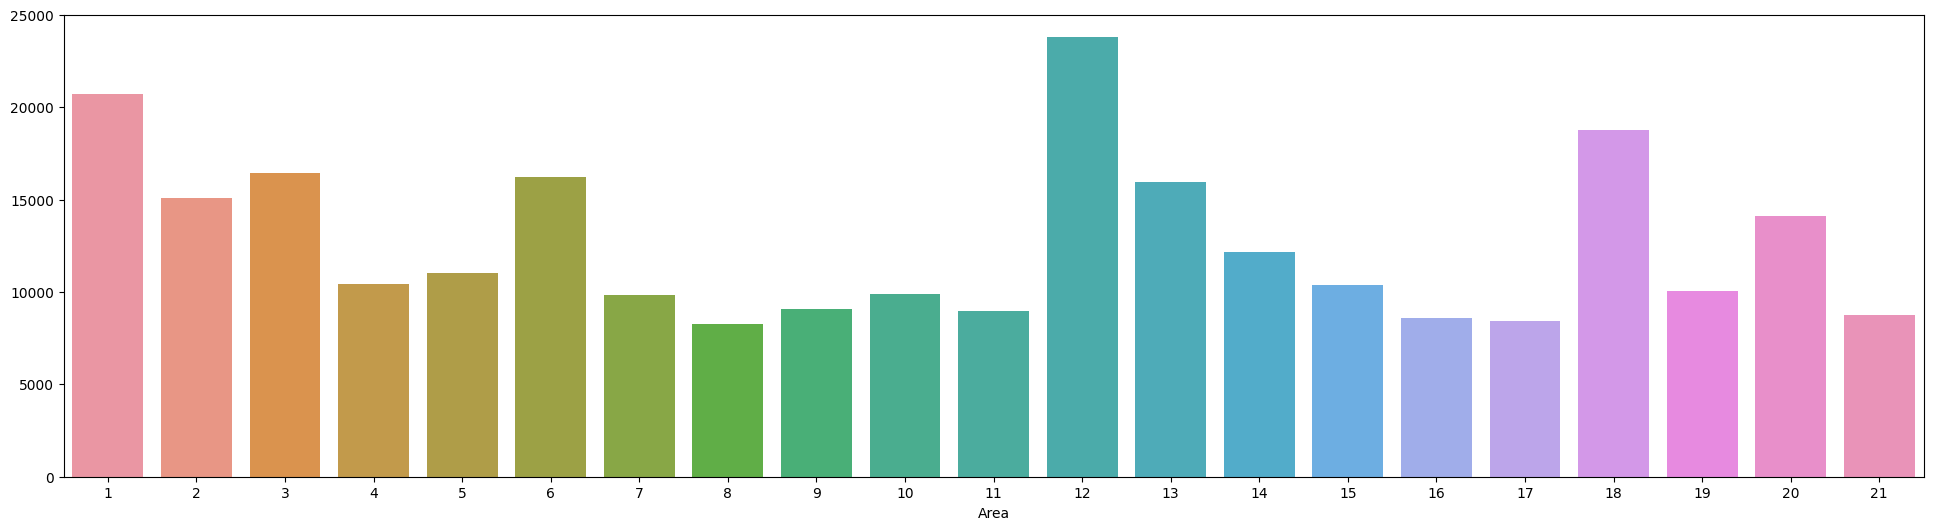

In [64]:
bn = df.Area.value_counts()
plt.figure(figsize=(24, 6))
sns.barplot(x=bn.index, y=bn.values)

<Axes: xlabel='Area_Name'>

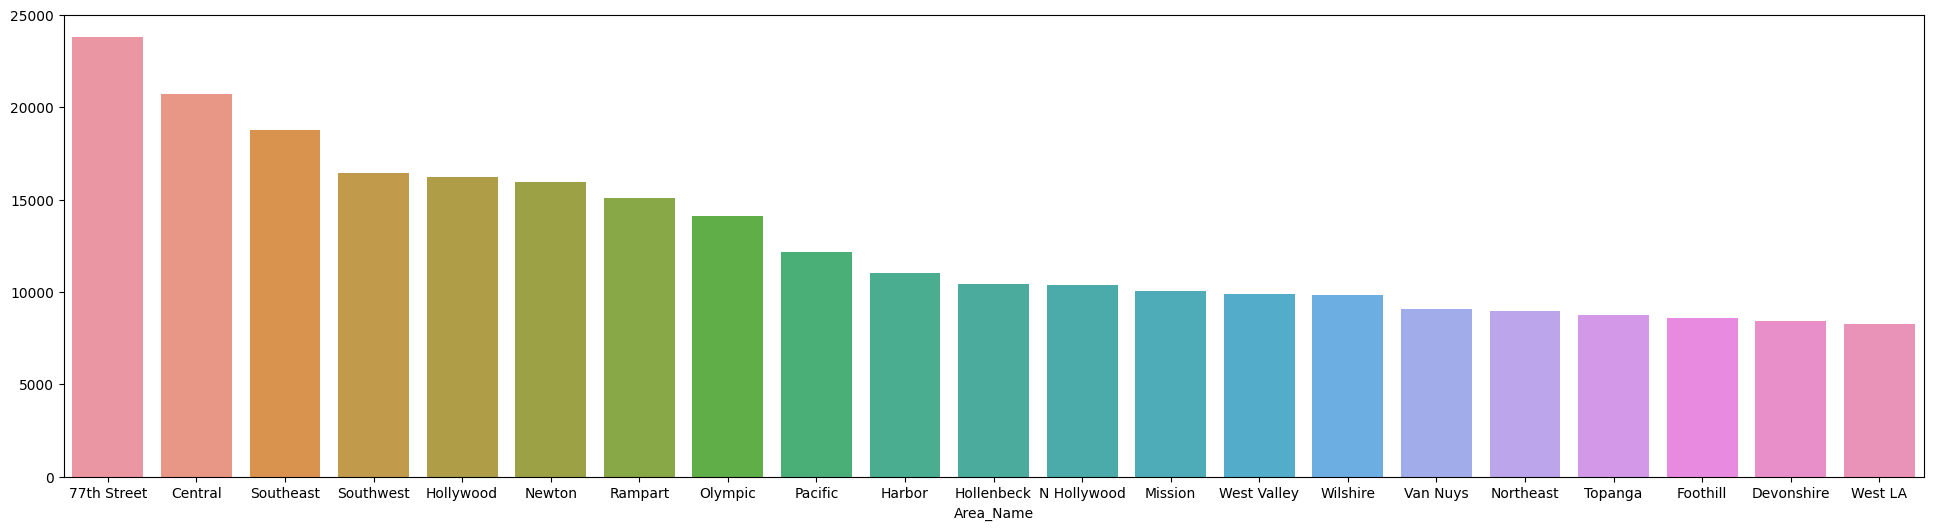

In [65]:
bn = df.Area_Name.value_counts()
plt.figure(figsize=(24, 6))
sns.barplot(x=bn.index, y=bn.values)

<Axes: xlabel='Victim_Descent'>

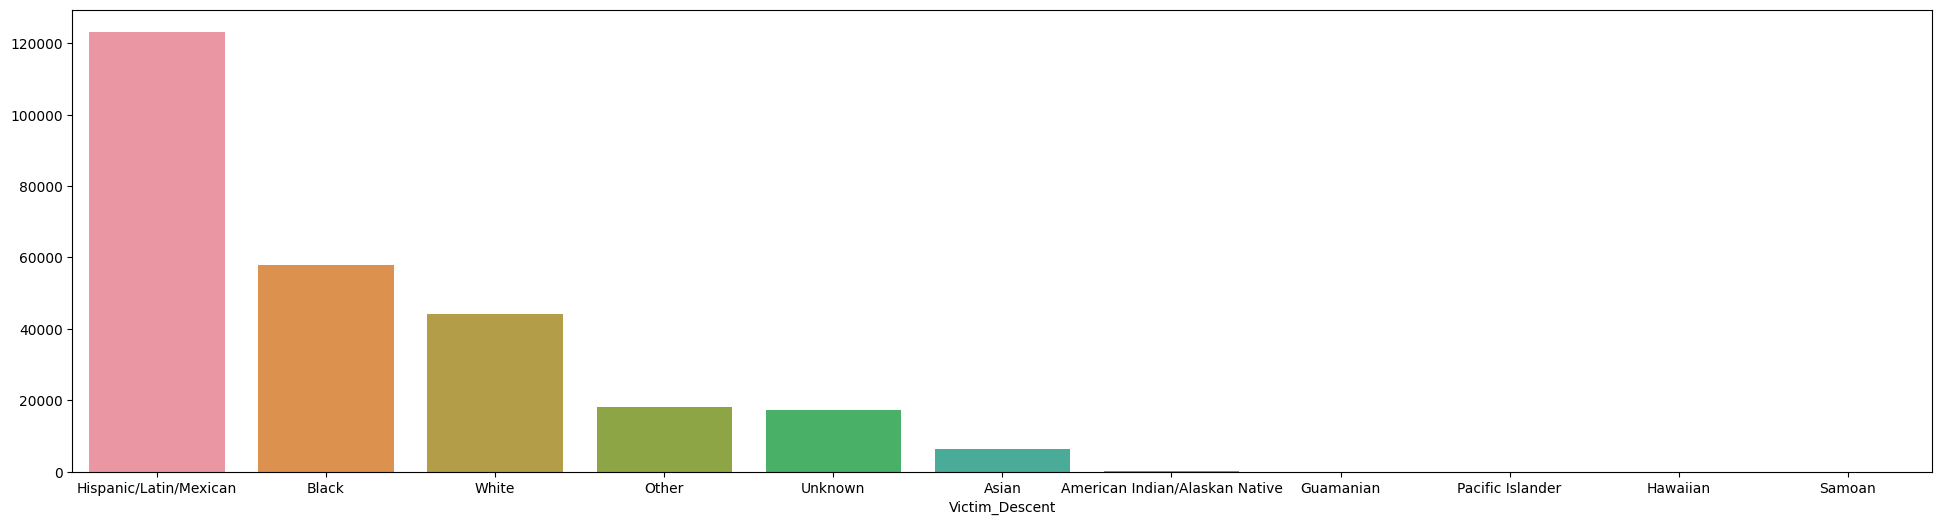

In [66]:
bn = df.Victim_Descent.value_counts()
plt.figure(figsize=(24, 6))
sns.barplot(x=bn.index, y=bn.values)

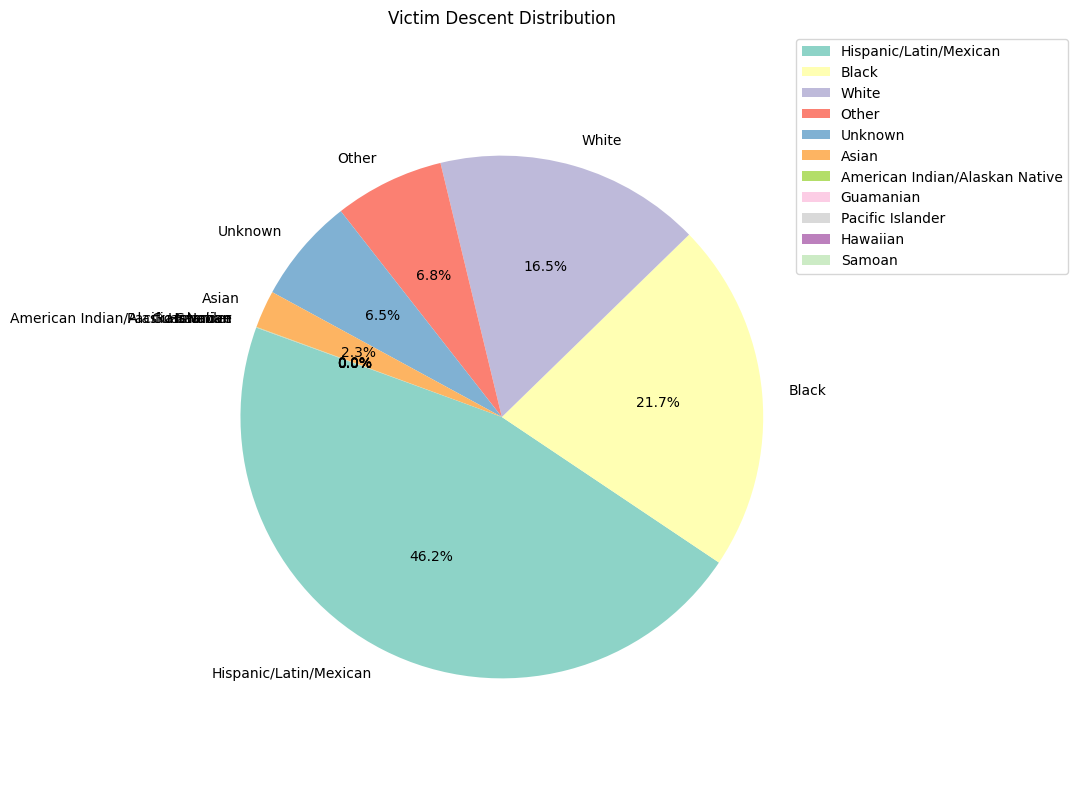

In [67]:
plt.figure(figsize=(10, 10))
plt.pie(bn.values, labels=bn.index, autopct='%1.1f%%', startangle=160, colors=sns.color_palette('Set3'), radius=0.8)
plt.title('Victim Descent Distribution', fontsize=12)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') 
plt.subplots_adjust(right=0.7)  
plt.show()

In [68]:
others = {
    'American Indian/Alaskan Native' : 'Other',
    'Pacific Islander' : 'Other',
    'Hawaiian' : 'Other',
    'Guamanian' : 'Other',
    'Samoan' : 'Other'
}
df['Victim_Descent'] = df['Victim_Descent'].replace(others)

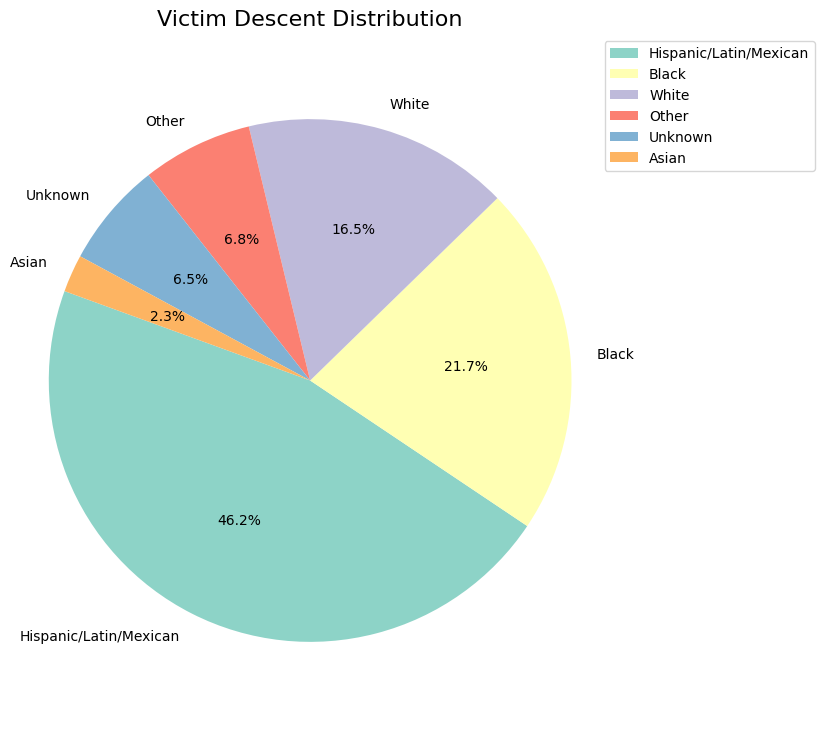

In [69]:
bn = df['Victim_Descent'].value_counts()
plt.figure(figsize=(10, 9))
threshold_percentage = 2.0
labels_to_display = [label if count / bn.sum() * 100 >= threshold_percentage else '' for label, count in bn.items()]
explode = [0.1 if count / bn.sum() * 100 < threshold_percentage else 0 for count in bn]
plt.pie(bn.values, labels=labels_to_display, autopct='%1.1f%%', startangle=160, colors=sns.color_palette('Set3'), radius=0.9, explode=explode)
plt.title('Victim Descent Distribution', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.subplots_adjust(right=0.7)
plt.axis('equal')
plt.show()

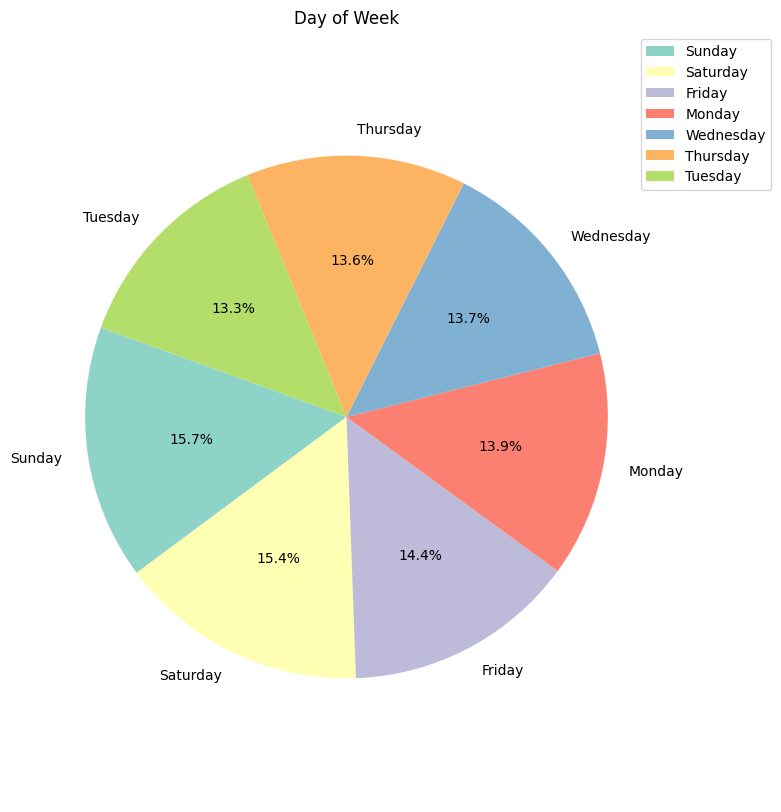

In [70]:
bn=df.Day_of_week.value_counts()
plt.figure(figsize=(10, 10))
plt.pie(bn.values, labels=bn.index, autopct='%1.1f%%', startangle=160, colors=sns.color_palette('Set3'), radius=0.8)
plt.title('Day of Week', fontsize=12)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.subplots_adjust(right=0.7)
plt.show()

<Axes: xlabel='Month'>

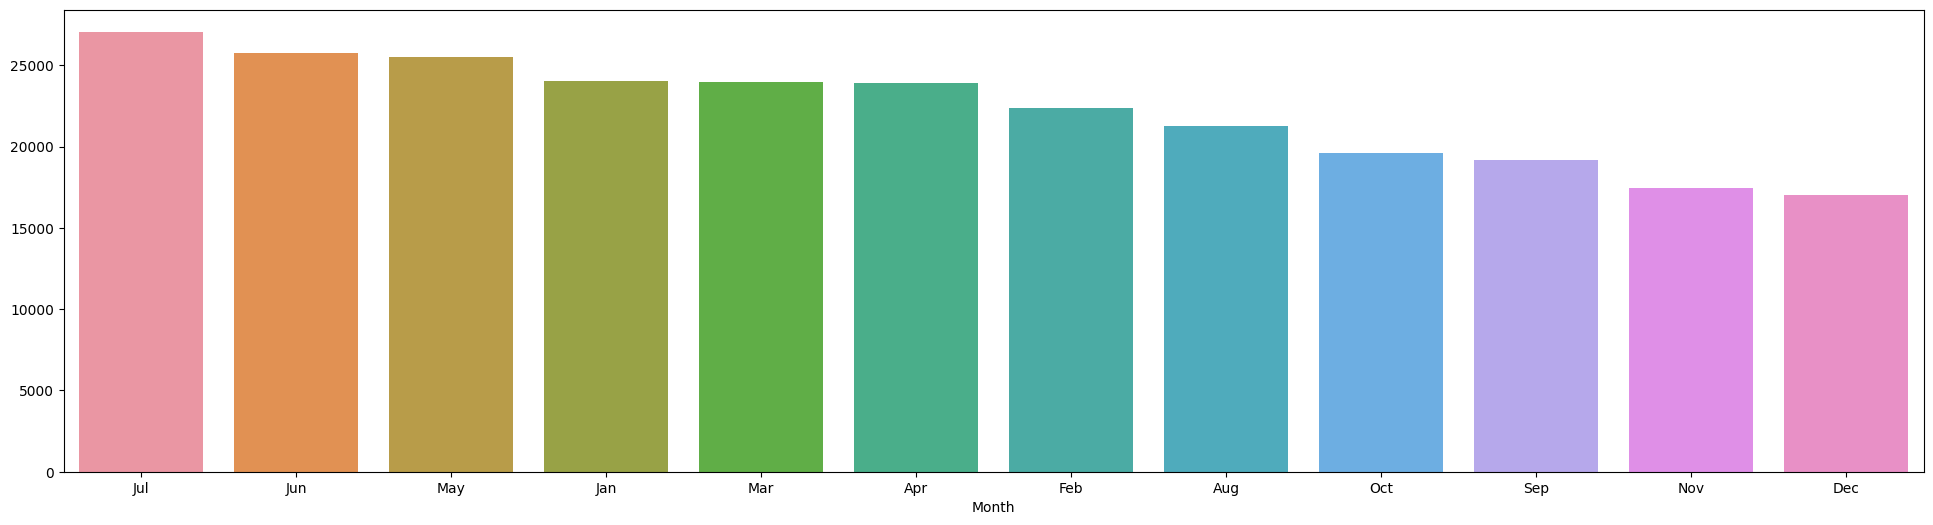

In [71]:
bn=df.Month.value_counts()
plt.figure(figsize=(24, 6))
sns.barplot(x=bn.index, y=bn.values)

In [72]:
df.Time_Occurred

0         22:30
1         03:30
5         03:00
10        22:00
11        09:55
          ...  
775325    18:30
775328    20:00
775329    14:00
775338    10:00
775339    16:30
Name: Time_Occurred, Length: 267123, dtype: object

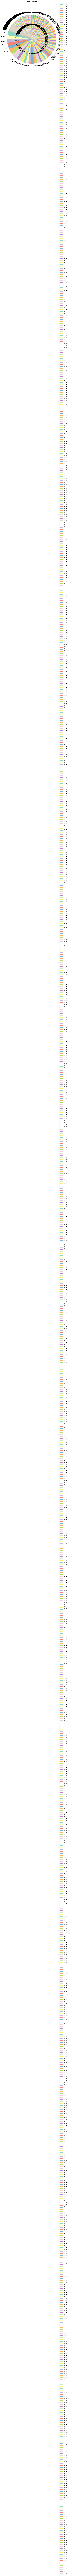

In [75]:
bn=df.Time_Occurred.value_counts()
plt.figure(figsize=(10, 10))
plt.pie(bn.values, labels=bn.index, autopct='%1.1f%%', startangle=160, colors=sns.color_palette('Set3'), radius=0.8)
plt.title('Time Occured', fontsize=12)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.subplots_adjust(right=0.7)
plt.show()

<Axes: xlabel='Time_Occurred'>

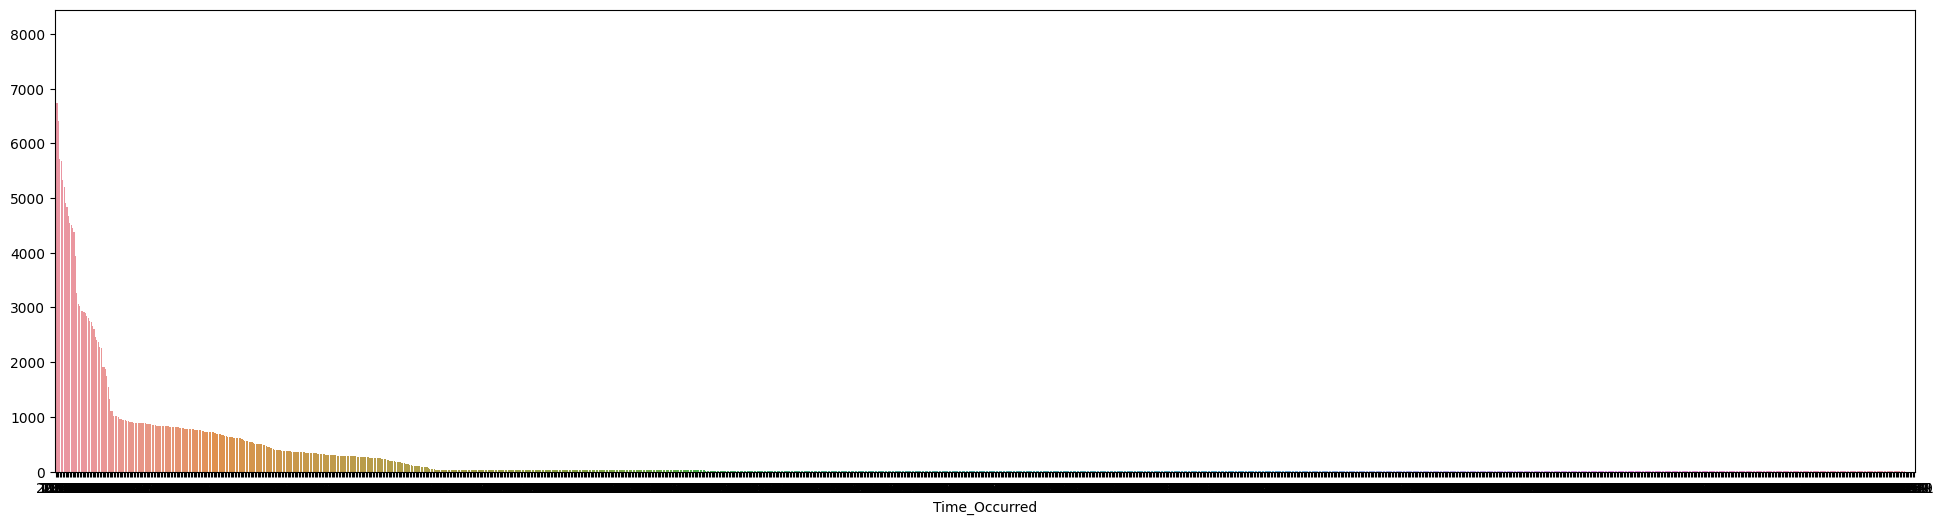

In [76]:
bn=df.Time_Occurred.value_counts()
plt.figure(figsize=(24, 6))
sns.barplot(x=bn.index, y=bn.values)